In [83]:
import nltk
nltk.download(["stopwords", "twitter_samples", "vader_lexicon"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anwender\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Anwender\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anwender\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [84]:
tweets = nltk.corpus.twitter_samples.strings()

In [85]:
print(len(tweets))
print(tweets[1000:1005])

30000
["@seanactual You mean you're not offering? :(", 'Saturday Classes! :(', "@EE I'm bad and kind of want an IPhone 6 but account says I can upgrade April 2016 too far :( *cont", 'You need to come back to England....:(  @MacHarmon', 'JAMES wore this in my meet and greet :((( http://t.co/MS60gaiIce']


In [86]:
from nltk.tokenize import TweetTokenizer
tweettok = TweetTokenizer()

tokens = []

for tweet in tweets:    
    tokens.extend(tweettok.tokenize(tweet))

In [87]:
stopwords = nltk.corpus.stopwords.words("english")
print(len(stopwords))
stopwords[:20]

179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [88]:
print(len(tokens))
tokens = [ token for token in tokens if token.lower() not in stopwords ]
print(len(tokens))

580006
413287


In [89]:
fd = nltk.FreqDist(tokens)
fd.most_common(50)

[(':', 17091),
 ('.', 15021),
 ('RT', 13539),
 (',', 9244),
 ('…', 6429),
 ('Miliband', 5222),
 ('"', 4749),
 (':(', 4592),
 ('!', 4591),
 ('SNP', 4491),
 ('Tories', 3923),
 (':)', 3738),
 ('?', 3557),
 ('-', 2912),
 ('Ed', 2687),
 ("'", 2476),
 ('(', 2460),
 ('Cameron', 2419),
 ('...', 2347),
 ('Labour', 2341),
 ('%', 2301),
 ('#bbcqt', 2106),
 ('David', 1672),
 ('Farage', 1640),
 (')', 1634),
 ('Tory', 1531),
 ('rather', 1530),
 ('UKIP', 1519),
 ('&', 1458),
 ('would', 1414),
 ('/', 1352),
 ('let', 1346),
 ('deal', 1212),
 ('work', 1186),
 ('#AskNigelFarage', 1168),
 ("I'm", 1150),
 ('vote', 1139),
 ('http', 1104),
 ('like', 1046),
 ('support', 974),
 ('Clegg', 956),
 ('people', 948),
 ('going', 941),
 ('get', 925),
 ('#UKIP', 911),
 ('Nigel', 902),
 ('want', 893),
 ('tonight', 876),
 ('1', 859),
 ('come', 855)]

In [90]:
#fd.most_common(2).plot()
#invest_tokens = [':)', 'tonight', 'ed']

tweets_smile = [tweet for tweet in tweets if ':)' in tweet]
tweets_tonight = [tweet for tweet in tweets if 'tonight' in tweet]
tweets_ed = [tweet for tweet in tweets if 'ed' in tweet]
print(len(tweets_smile))
print(len(tweets_tonight))
print(len(tweets_ed))

3591
1016
9563


In [91]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Trump is stupid")

results_smile = [sia.polarity_scores(tweet) for tweet in tweets_smile]
results_tonight = [sia.polarity_scores(tweet) for tweet in tweets_tonight]
results_ed = [sia.polarity_scores(tweet) for tweet in tweets_ed]

print(tweets_smile[0])
print(results_smile[0])

@Israelgirly They sure do, esp now when ppl are talking crap about Millie!! &gt;:( I'll go straight to that FB page:)
{'neg': 0.102, 'neu': 0.709, 'pos': 0.188, 'compound': 0.2924}


In [99]:
average_smile = {'neg':0, 'pos':0}
for result in results_smile:
    average_smile['neg'] += result['neg']
    average_smile['pos'] += result['pos']
average_smile['neg'] = average_smile['neg']/len(results_smile)
average_smile['pos'] = average_smile['pos']/len(results_smile)
sum_smile = average_smile['neg'] + average_smile['pos']
average_smile['neg'] = average_smile['neg'] / (sum_smile)
average_smile['pos'] = average_smile['pos'] / (sum_smile)
print(average_smile['neg'])
print(average_smile['pos'])

average_tonight = {'neg':0, 'pos':0}
for result in results_tonight:
    average_tonight['neg'] += result['neg']
    average_tonight['pos'] += result['pos']
average_tonight['neg'] = average_tonight['neg']/len(results_tonight)
average_tonight['pos'] = average_tonight['pos']/len(results_tonight)
sum_tonight = average_tonight['neg'] + average_tonight['pos']
average_tonight['neg'] = average_tonight['neg'] / (sum_tonight)
average_tonight['pos'] = average_tonight['pos'] / (sum_tonight)

average_ed = {'neg':0, 'pos':0}
for result in results_ed:
    average_ed['neg'] += result['neg']
    average_ed['pos'] += result['pos']
average_ed['neg'] = average_ed['neg']/len(results_ed)
average_ed['pos'] = average_ed['pos']/len(results_ed)
sum_ed = average_ed['neg'] + average_ed['pos']
average_ed['neg'] = average_ed['neg'] / (sum_ed)
average_ed['pos'] = average_ed['pos'] / (sum_ed)


0.06898612348838977
0.9310138765116103


[0.9310138765116103, 0.6369153213378168, 0.567923287749928]
[0.06898612348838977, 0.3630846786621832, 0.43207671225007194]


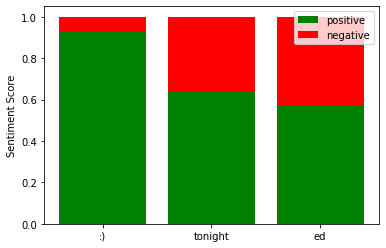

In [100]:
import matplotlib.pyplot as plt
pos_res = [average_smile['pos'], average_tonight['pos'], average_ed['pos']]
neg_res = [average_smile['neg'], average_tonight['neg'], average_ed['neg']]
print(pos_res)
print(neg_res)
words = [':)', 'tonight', 'ed']
plt.bar(words, pos_res, color='green', label="positive")
plt.bar(words, neg_res, bottom = pos_res, color='red', label="negative")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()